# Time Series Data Exploration & Visualization Assignment

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [ ]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', sep=';')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         object 
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Convert the SalesDate field to a datetime data type.

In [ ]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'], unit='ns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


### Create a line chart showing the number of total units sold per day in February.

In [ ]:
df['Date'] = df['SalesDate'].dt.date
df['SalesMonth'] = df['SalesDate'].dt.month
df['SalesDay'] = df['SalesDate'].dt.day

In [ ]:
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Date,SalesMonth,SalesDay
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,2018-02-05,2.0,5.0
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,2018-02-02,2.0,2.0
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,2018-05-03,5.0,3.0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,2018-04-07,4.0,7.0
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,2018-02-12,2.0,12.0


In [ ]:
feb = df.loc[df['SalesMonth'] == 2.0]
feb.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Date,SalesMonth,SalesDay
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,2018-02-05,2.0,5.0
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,2018-02-02,2.0,2.0
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,2018-02-12,2.0,12.0
5,6,13,28663,413,8,NaN,"0,00",2018-02-07 10:33:24.990,3KTAYIZPGDQMZMRWZ8NG,2018-02-07,2.0,7.0
11,12,17,28353,285,8,NaN,"0,00",2018-02-07 00:50:06.000,BLQPUVH22XKER90WAW7P,2018-02-07,2.0,7.0


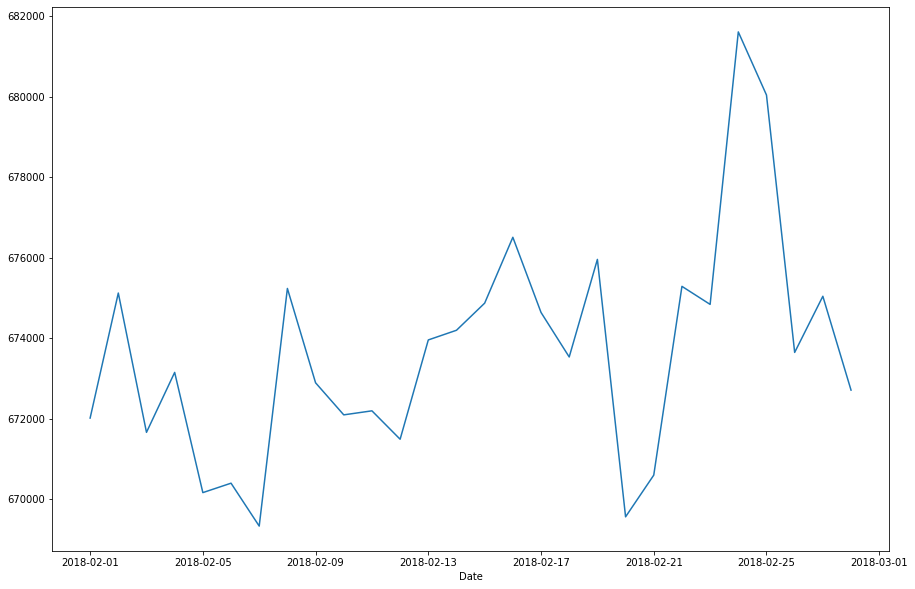

In [ ]:
feb.groupby('Date').sum()['Quantity'].plot(kind='line', figsize=(15,10))

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [ ]:
march = df.loc[(df['SalesMonth'] == 3.0) & df['ProductID'].isin([124,344,407,449])]
march_products = march.pivot_table(index='SalesDay',columns='ProductID',values='Quantity',aggfunc='count')


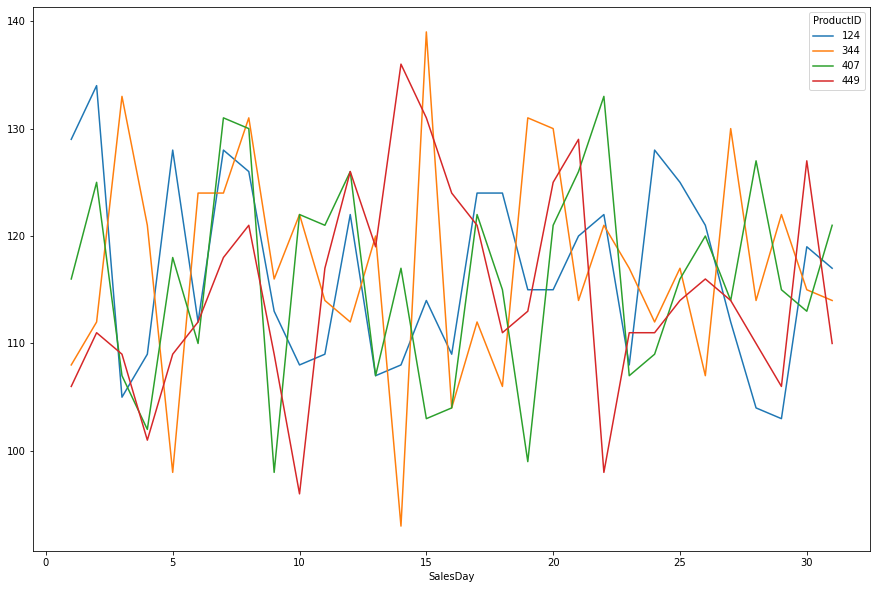

In [ ]:
march_products.plot(kind='line', figsize=(15,10))

### Create a bar chart that shows units sold by each hour of the day.

In [ ]:
df['SalesHour'] = df['SalesDate'].dt.hour

df.groupby('SalesHour').count()['Quantity']

SalesHour
0.0     279105
1.0     278511
2.0     279140
3.0     277942
4.0     278480
5.0     278870
6.0     279112
7.0     278552
8.0     279259
9.0     279165
10.0    278795
11.0    278709
12.0    278697
13.0    278551
14.0    278003
15.0    278729
16.0    279578
17.0    278782
18.0    278666
19.0    279500
20.0    279360
21.0    278554
22.0    278138
23.0    278401
Name: Quantity, dtype: int64

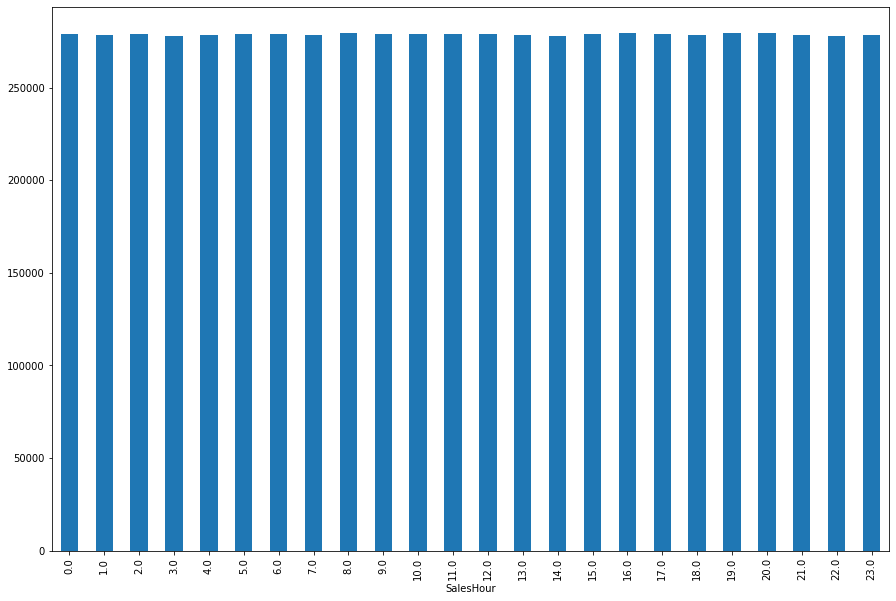

In [ ]:
df.groupby('SalesHour').count()['Quantity'].plot(kind='bar', figsize=(15,10))

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [ ]:
df['SalesWeekday'] = df['SalesDate'].dt.weekday

heatmap = df.pivot_table(index='SalesHour', columns='SalesWeekday', values='Quantity', aggfunc='count')

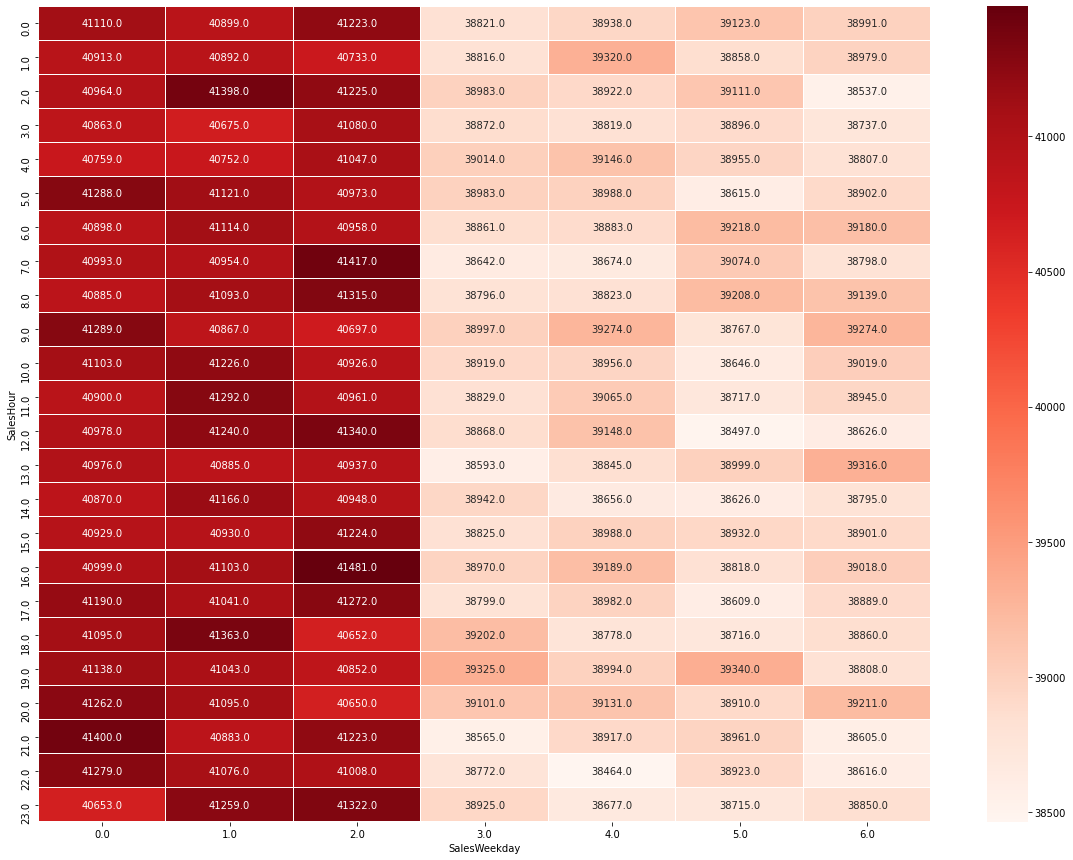

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data=heatmap, annot=True, fmt='.1f', cmap='Reds', linewidths=.01)

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [ ]:
from random import sample

ids = list(df['ProductID'].unique())
rand_ids = sample(ids,20)
rand_ids

[123,
 52,
 364,
 265,
 187,
 137,
 351,
 108,
 269,
 19,
 16,
 374,
 319,
 136,
 393,
 301,
 251,
 4,
 373,
 207]

In [ ]:
rand_df = df[df.ProductID.isin(rand_ids)]

rand_plot = rand_df.pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')

In [ ]:
def correlation_plot(df, title=''):
  corr = df.corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  plt.subplots(figsize=(15,10))
  cmap = sns.diverging_palette(6,255, as_cmap=True)
  sns.heatmap(corr, mask=mask, center=0, linewidths=.5)
  plt.title(title + "\n", fontsize=20)


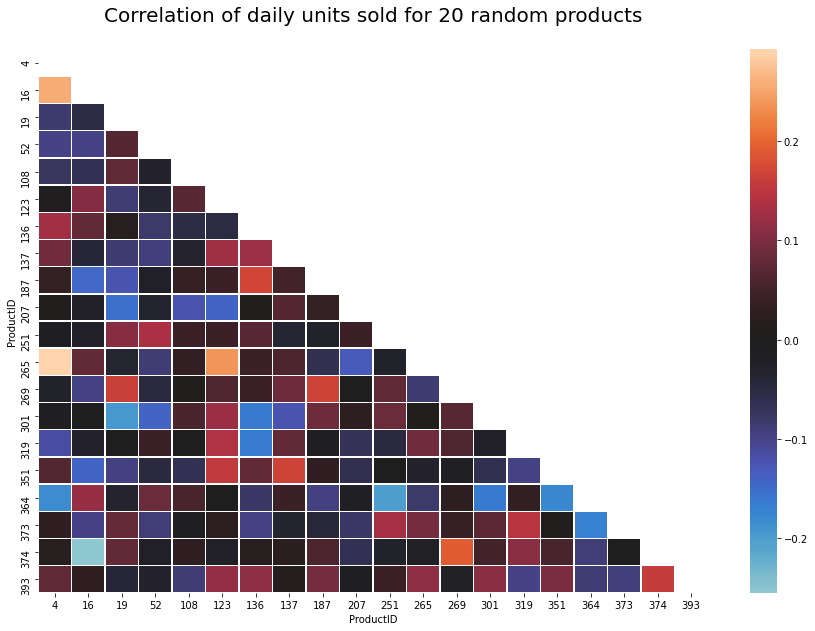

In [ ]:
correlation_plot(rand_plot, 'Correlation of daily units sold for 20 random products')

### Create a histogram showing the distribution of daily units sold.

In [ ]:
def histogram(df, field=None,length=8, width=15, title=''):
  plt.figure(figsize=(width,length))
  sns.displot(df[field])
  plt.title(title + "\n", fontsize=16)
  plt.show()

<Figure size 1080x576 with 0 Axes>

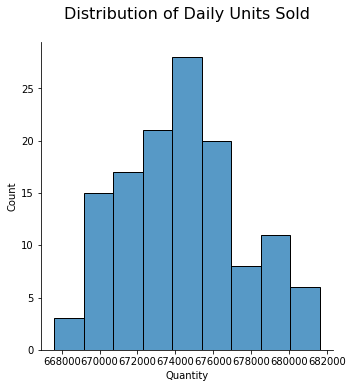

In [ ]:
daily_units = df.groupby('Date').agg({'Quantity': 'sum'}).reset_index()

histogram(daily_units, 'Quantity', title='Distribution of Daily Units Sold')

### Create a violin plot showing the distribution of daily units sold by month.

In [ ]:
def violin_plot(df, x, y, length=8, width=15, title=''):
  plt.figure(figsize=(width,length))
  sns.violinplot(x=x, y=y, data=df)
  plt.title(title + "\n", fontsize=16)
  plt.show()

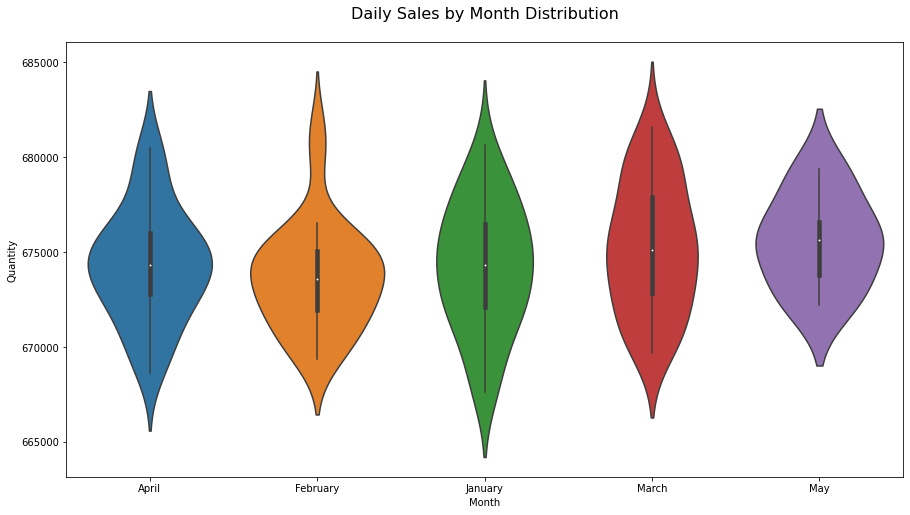

In [ ]:
df['Month'] = df['SalesDate'].dt.month_name()
daily_month_units_sold = df.groupby(['Month','Date']).agg({'Quantity':'sum'}).reset_index()

violin_plot(daily_month_units_sold, 'Month','Quantity',title='Daily Sales by Month Distribution')